# Steps : 
Importing Libraries and Dataset. ->
Scaling the dataset. ->
Checking Multicollinearity and removing it. ->
Creating test and training partitions. ->
Implementing the Linear Regression model. ->
Generating predictions over the test set. ->
Evaluating the model. ->
Preparing the Residual plot. ->
Checking the Assumptions of Linear Regression. ->
Visualising the Coefficient plot. ->

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [6]:
data = pd.read_csv('Transformed_Dataset_Final')
data.head()

,Unnamed: 0,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Condition_of_the_House_Okay,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
#Should have done in the while transforming the dataset
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

# Scaling the Dataset

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# We seperate target variable in "Y".
Y = data['Sale_price']
'''Using instance of StandardScaler i.e scaler we scale the 
independent variables and store in in "X". That is why we are droping Sale_Price here bcoz it is
target variable'''
X = scaler.fit_transform(data.drop(columns = ['Sale_price']))

# We convert it into pandas dataset for easy manipulations
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_price']).columns)
X.head()


,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Condition_of_the_House_Okay,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.089574,-0.350481,-0.482158,-0.419600,-0.493498,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.089574,-0.350481,2.074011,-0.419600,-0.493498,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.089574,-0.350481,2.074011,-0.419600,-0.493498,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.089574,-0.350481,-0.482158,2.383223,-0.493498,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.089574,-0.350481,-0.482158,-0.419600,2.026351,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158


# Checking and removing multicollinearity

In [11]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Condition_of_the_House_Okay,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.051957,-0.010603,-0.039342,-0.074129,0.030083,0.008513,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,-0.077419,-0.032810,-0.081460,-0.034459,0.093060,0.036247,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,-0.065334,-0.058817,-0.063005,-0.078761,0.103934,0.043033,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.037619,0.023684,0.052103,-0.041112,0.010310,-0.030892,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,-0.055951,-0.003385,-0.067904,0.079211,0.076779,-0.003359,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,-0.018557,-0.065000,0.004754,0.005905,-0.003310,0.042411,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,-0.090561,-0.075495,-0.121379,-0.047869,0.169764,0.060875,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,-0.058931,-0.028348,-0.052418,-0.090628,0.109722,0.016198,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,-0.025312,-0.069149,-0.032302,0.006247,0.010552,0.057595,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.067269,-0.070111,0.022094,0.095882,-0.066597,0.011965,0.025718,0.101486,-0.002705,-0.002492


In [13]:
# to find pair of independent variables with high correlation
# correlation > 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

Removing multicollinearity : Calculating VIF

In [15]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF


No of Bedrooms                                  1.639395
No of Bathrooms                                 3.375104
Flat Area (in Sqft)                          1482.501302
Lot Area (in Sqft)                              2.107901
No of Floors                                    2.127752
No of Times Visited                             1.433068
Overall Grade                                   2.967804
Area of the House from Basement (in Sqft)    1206.179873
Basement Area (in Sqft)                       345.647221
Age of House (in Years)                         2.630438
Latitude                                        2.454247
Longitude                                       1.687633
Living Area after Renovation (in Sqft)          3.065200
Lot Area after Renovation (in Sqft)             2.143441
Years Since Renovation                          2.788107
Ever_Renovated_Yes                              2.955810
Waterfront_View_Yes                             1.208657
Condition_of_the_House_Excellen

In [17]:
#We need to remove independent variable with high correlations
#if we try to remove one then the correlation value will change
#thus again the correlation will have to be calculated
#we can automate this process

In [18]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [19]:
#removing VIF > 5 repetitively
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Condition_of_the_House_Okay,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.089574,-0.350481,-0.482158,-0.419600,-0.493498,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.089574,-0.350481,2.074011,-0.419600,-0.493498,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.089574,-0.350481,2.074011,-0.419600,-0.493498,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.089574,-0.350481,-0.482158,2.383223,-0.493498,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.089574,-0.350481,-0.482158,-0.419600,2.026351,-0.189489,-0.287712,-0.112274,-0.16885,-0.048158


In [20]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638914
 No of Bathrooms                              3.373938
 Lot Area (in Sqft)                           2.107317
 No of Floors                                 2.127671
 No of Times Visited                          1.433045
 Overall Grade                                2.957312
 Area of the House from Basement (in Sqft)    4.578628
 Basement Area (in Sqft)                      1.974940
 Age of House (in Years)                      2.627391
 Latitude                                     2.454147
 Longitude                                    1.687593
 Living Area after Renovation (in Sqft)       3.060954
 Lot Area after Renovation (in Sqft)          2.143161
 Years Since Renovation                       2.788073
 Ever_Renovated_Yes                           2.955554
 Waterfront_View_Yes                          1.208504
 Condition_of_the_House_Excellent             1.206204
 Condition_of_the_House_Good                  1.250601
 Condition

# Creating test and Train Partitions

In [21]:
X = vif_data
Y = data['Sale_price']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

# Implementing Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

# normalize = True makes sure y-intercept (c) = 0
lr = LinearRegression(normalize = True)

#lr.fit implements the gradient descent and complete procedure over training data.
#gradient descent finds the best set of parameters to model data
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [24]:
'''
-all the coefficients corresponding to independent variables that linear regression has calculated
-y = m0 + m1x1 + m2x2 + ......
The coef values are m1 , m2, m3... values which considers all 
independent variables and thus makes a suitable regression line for dataset
- Since data is normalised m0 = 0 
'''
lr.coef_

array([ -4247.56667099,  11627.72608354,  15043.30943467,   2982.04846699,
        26855.58559264,  59512.7794271 ,  81075.2909163 ,  27730.15153551,
        28484.7188558 ,  22090.19209126, -22583.16261204,  18233.04953949,
        -2604.97692575, -10230.99125289,  14458.17865575,  10907.51785716,
        13930.57380212,   4788.1871709 ,  -1950.98797699,  11715.70078598,
        32789.95175023,  62349.23664135,  80066.94046133,  50284.28516673,
        72594.73304532,  39911.77765824,  67088.35058143,  22011.5439855 ])

# Generating Predictions over Test set

In [25]:
predictions = lr.predict(x_test)

# this will generate r(squared) value
lr.score(x_test, y_test)

0.847515832245677

In [27]:
#0.847 is repectable score

# Evaluating the model
RESIDUAL PLOT

In [28]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals' : residuals,
                              'predictions': predictions})
residual_table = residual_table.sort_values(by = 'predictions')

In [29]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

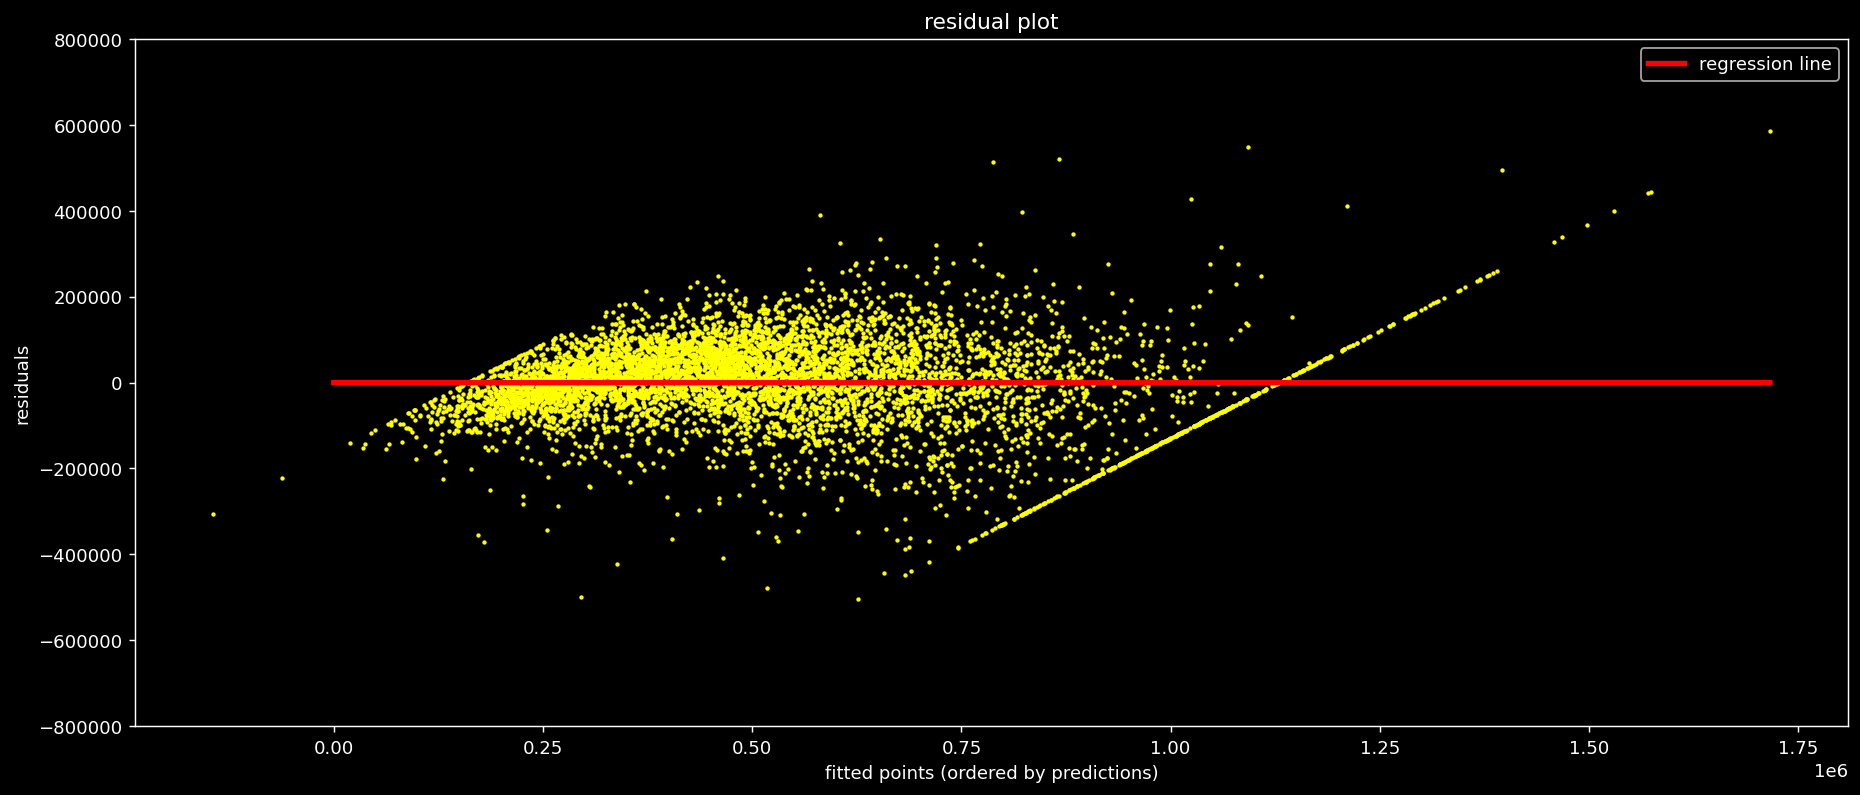

In [33]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'yellow', s = 2)
plt.plot(z, k, color = 'red', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

DISTRIBUTION OF ERRORS

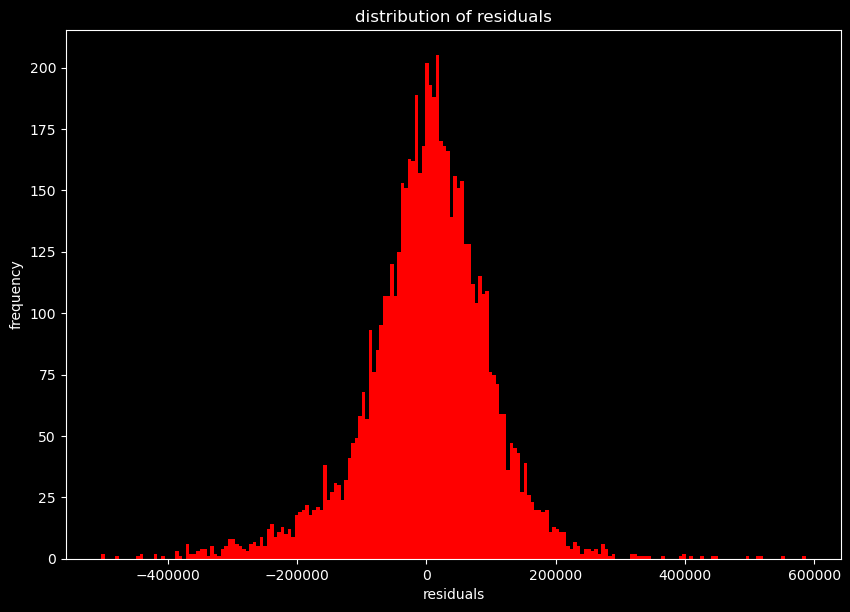

In [34]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# Checking Assumptions of Linear regression model
When we assessed the residual plot and errors

# Visualising the coefficient plot

In [36]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

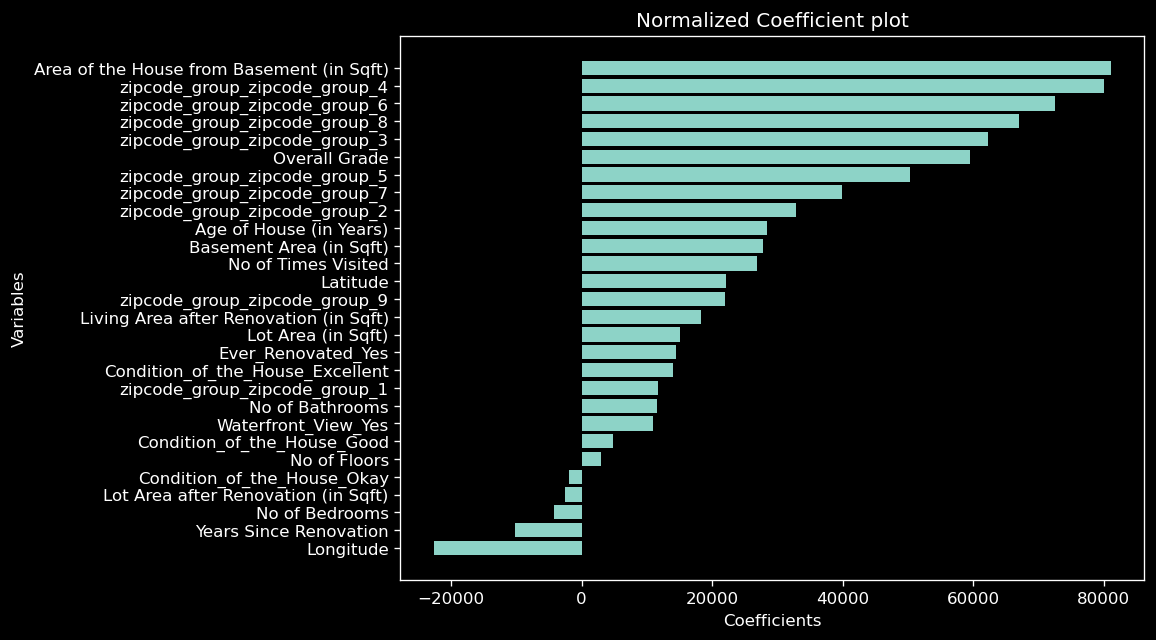

In [37]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

# Points we can infer from the bar graph
1. Zipcode_Group Zipcode_Group 4 plays major role in Sale Price of house
2. Area of the house also plays major role in Sale Price of house
3. Older houses have greater prices than newer houses. That can be refered by a
   short graph.
4. Years Since renovation have negative Significance. As time from last renovation is increased the house price have decreased.

In [71]:
lr.predict([x_test.iloc[3]])

array([549924.05280448])